# **CNN - cifar10 Dataset**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. The classes are completely mutually exclusive.

Here are the classes in the dataset:
* 0 - airplane										
* 1 - automobile										
* 2 - bird										
* 3 - cat										
* 4 - deer										
* 5 - dog										
* 6 - frog										
* 7 - horse										
* 8 - ship										
* 9 - truck										

In [146]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from sklearn.metrics import classification_report

## Load the Dataset

In [147]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [148]:
# Check the shape of the data
x_train.shape, y_train.shape, x_test.shape, y_test.shape
print("Training data shape:", x_train.shape, y_train.shape)
print("Testing data shape: ", x_test.shape, y_test.shape)

Training data shape: (50000, 32, 32, 3) (50000, 1)
Testing data shape:  (10000, 32, 32, 3) (10000, 1)


In [149]:
# Check the value counts of each class in the training dataset
pd.DataFrame(y_train).value_counts()

0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
dtype: int64

In [150]:
# Check the value counts of each class in the testing dataset
pd.DataFrame(y_test).value_counts()

0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
dtype: int64

## Visualize the Dataset

### Let's explore the representation of an image in the dataset

In [151]:
single_image = x_train[0]
single_image

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [152]:
# Check the shape of the single image
single_image.shape

(32, 32, 3)

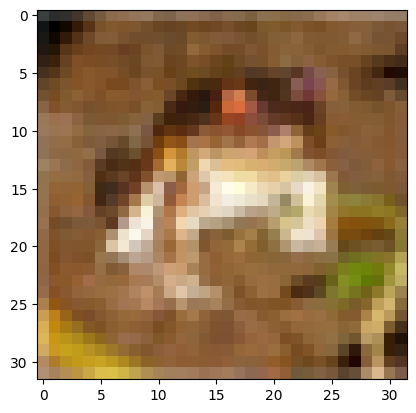

In [153]:
# plot the first image in the training data
plt.imshow(single_image)

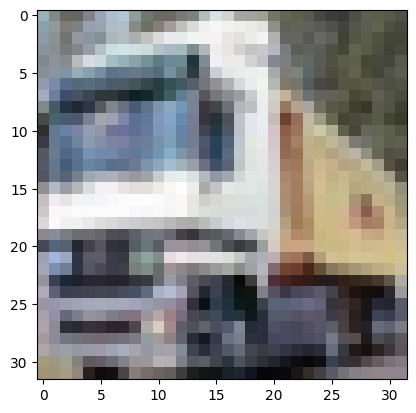

In [154]:
# plot the second image in the training data
plt.imshow(x_train[1])

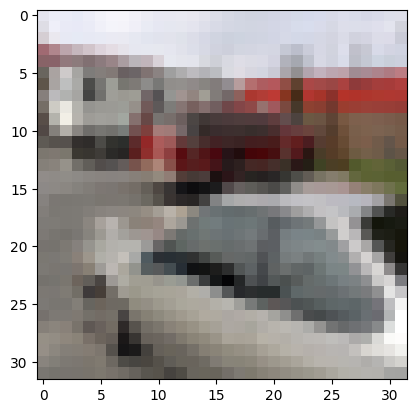

In [155]:
# Plot the last image in the training data
plt.imshow(x_train[-1])

## Pre-processing

In [156]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [157]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [158]:
# Check the shape of y_train
y_train.shape

(50000, 1)

In [159]:
# Check the shape of y_test
y_test.shape

(10000, 1)

## One-Hot Encoding of the Labels
### Converting class vector (integers) to a binary class matrix

In [160]:
y_cat_train = to_categorical(y_train, 10)
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [161]:
y_cat_test = to_categorical(y_test, 10)
y_cat_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

## Normalizing the data

In [162]:
# Check the maximum value in an image
single_image.max()

255

In [163]:
# Check the minimum value in an image
single_image.min()

0

### Scaling the images

In [164]:
# Divide the values by the maximum value to get the values between 0 and 1
x_train = x_train/255
x_test = x_test/255

In [165]:
# Check the values in the scaled image
scaled_image = x_train[0]
scaled_image

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [166]:
# Check the maximum value in the scaled image
scaled_image.max()

1.0

In [167]:
# Check the minimum value in the scaled image
scaled_image.min()

0.0

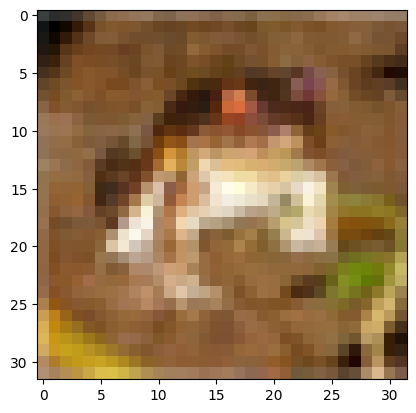

In [168]:
# Visualize the scaled image
plt.imshow(scaled_image)

## Reshape the data
To make sure it's in the appropriate format for the model.

In [169]:
# Reshape the training data
x_train = x_train.reshape(50000, 32, 32, 3)

In [170]:
x_train.shape

(50000, 32, 32, 3)

In [171]:
# Reshape the testing data
x_test = x_test.reshape(10000, 32, 32, 3)

In [172]:
x_test.shape

(10000, 32, 32, 3)

## **CNN Model**

In [173]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Create the Model

In [174]:
# Create a sequential model
model= Sequential()

# Add the first convolutional layer with 32 filters, a kernel size of (3,3), and ReLU activation function
# Input shape is set to (32, 32, 3) indicating the input image dimensions (height, width, channels)
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu'))

# Add a max pooling layer with a pool size of (2,2) to downsample the spatial dimensions
model.add(MaxPool2D(pool_size=(2,2)))

# Adding the second convolutional layer with 32 filters, a kernel size of (3,3), and ReLU activation function
# Note: input_shape is not needed here, as Keras automatically infers it from the previous layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))

# Adding another max pooling layer with a pool size of (3,3)
model.add(MaxPool2D(pool_size=(3,3)))

# Flatten the 2D output to a 1D array before passing it to the fully connected layers
model.add(Flatten())

# Add a dense (fully connected) layer with 128 neurons and ReLU activation function
model.add(Dense(128, activation='relu'))

# Add the final dense layer with 10 neurons (for 10 classes in a classification task) and softmax activation
model.add(Dense(10, activation='softmax'))

### Compile the Model

In [175]:
# Compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [176]:
# Print the summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 4, 4, 32)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 128)              

### Train the Model

In [177]:
# Train the model on the training data for 2 epochs
model.fit(x_train, y_cat_train, epochs=2)

Epoch 1/2
1563/1563 [==============================] - 26s 13ms/step - loss: 1.4875 - accuracy: 0.4644
Epoch 2/2
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1709 - accuracy: 0.5884


In [178]:
model.metrics_names

['loss', 'accuracy']

### Evaluate the Model

In [180]:
# Evaluate the trained model on the test data
test_loss, test_acc = model.evaluate(x_test, y_cat_test)
# print the evaluation metrics
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 4s 5ms/step - loss: 1.1200 - accuracy: 0.6083
Test loss: 1.1200443506240845
Test accuracy: 0.608299970626831


### Make predictions on test data using the trained Model

In [181]:
from sklearn.metrics import classification_report

# Get predictions for the test data 
predictions = model.predict(x_test)
predictions

313/313 [==============================] - 5s 5ms/step


array([[1.83425099e-02, 2.34305175e-04, 7.67936409e-02, ...,
        2.87171220e-04, 2.26274375e-02, 4.82711883e-04],
       [1.21577777e-01, 4.22646850e-01, 6.91142224e-04, ...,
        1.19100041e-05, 4.30611402e-01, 2.42666993e-02],
       [6.28506318e-02, 1.18158095e-01, 6.40325667e-03, ...,
        3.27833113e-04, 7.51849890e-01, 4.87137400e-02],
       ...,
       [1.33635290e-03, 2.33785559e-05, 1.86242580e-01, ...,
        4.51968983e-02, 3.29193099e-05, 3.87085951e-04],
       [4.74815443e-02, 6.41839564e-01, 1.31787941e-01, ...,
        5.36887953e-03, 3.28508252e-03, 1.45880487e-02],
       [5.30959340e-04, 2.36287291e-04, 4.82584070e-03, ...,
        9.48185861e-01, 1.33718104e-05, 3.74038907e-04]], dtype=float32)

In [183]:
# Extract the predicted classes (class with the highest probability) from the predicted probabilities
prediction_classes = np.argmax(predictions, axis=1)
prediction_classes

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [184]:
# Generate a classification report
report = classification_report(y_test, prediction_classes)
print(report)

              precision    recall  f1-score   support

           0       0.63      0.66      0.64      1000
           1       0.74      0.76      0.75      1000
           2       0.39      0.59      0.47      1000
           3       0.50      0.38      0.43      1000
           4       0.64      0.40      0.50      1000
           5       0.63      0.41      0.50      1000
           6       0.56      0.82      0.67      1000
           7       0.73      0.64      0.69      1000
           8       0.65      0.79      0.71      1000
           9       0.75      0.63      0.69      1000

    accuracy                           0.61     10000
   macro avg       0.62      0.61      0.60     10000
weighted avg       0.62      0.61      0.60     10000



## **Improve the Model**

* Increase the number of filters from 32 to 64 in the convolutional layers.
* Change the pool size of the second convolutional layer to (2,2).
* Train the model for 10 epochs.

### Create the Model

In [185]:
# Create a sequential model
model= Sequential()

# Add the first convolutional layer with 64 filters, a kernel size of (3,3), and ReLU activation function
# Input shape is set to (32, 32, 3) indicating the input image dimensions (height, width, channels)
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu'))

# Add a max pooling layer with a pool size of (2,2) to downsample the spatial dimensions
model.add(MaxPool2D(pool_size=(2,2)))

# Adding the second convolutional layer with 64 filters, a kernel size of (3,3), and ReLU activation function
# Note: input_shape is not needed here, as Keras automatically infers it from the previous layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# Adding another max pooling layer with a pool size of (3,3)
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten the 2D output to a 1D array before passing it to the fully connected layers
model.add(Flatten())

# Add a dense (fully connected) layer with 128 neurons and ReLU activation function
model.add(Dense(128, activation='relu'))

# Add the final dense layer with 10 neurons (for 10 classes in a classification task) and softmax activation
model.add(Dense(10, activation='softmax'))

### Compile the Model

In [186]:
# Compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [187]:
# print the summary of the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 2304)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

### Train the Model

In [188]:
# Train the model on the training data for 10 epochs
model.fit(x_train, y_cat_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 42s 24ms/step - loss: 1.4276 - accuracy: 0.4879
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0778 - accuracy: 0.6209
Epoch 3/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9289 - accuracy: 0.6763
Epoch 4/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8238 - accuracy: 0.7136
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7424 - accuracy: 0.7415
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6724 - accuracy: 0.7654
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6053 - accuracy: 0.7866
Epoch 8/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.5504 - accuracy: 0.8089
Epoch 9/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.4885 - accuracy: 0.8280
Epoch 10/10
1563/1563 [==============================] - 71s 46m

### Evaluate the Model

In [189]:
# Evaluate the trained model on the test data
test_loss, test_acc = model.evaluate(x_test, y_cat_test)
# print the evaluation metrics
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 6s 8ms/step - loss: 0.9973 - accuracy: 0.6998
Test loss: 0.9973319172859192
Test accuracy: 0.6998000144958496


### Make predictions on test data using the newly trained Model

In [190]:
from sklearn.metrics import classification_report

# Get predictions for the test data 
predictions = model.predict(x_test)

# Extract the predicted classes (class with the highest probability) from the predicted probabilities
prediction_classes = np.argmax(predictions, axis=1)

313/313 [==============================] - 7s 12ms/step


In [191]:
# Generate a classification report
report = classification_report(y_test, prediction_classes)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.76      0.74      1000
           1       0.77      0.86      0.81      1000
           2       0.65      0.53      0.58      1000
           3       0.52      0.48      0.50      1000
           4       0.69      0.56      0.62      1000
           5       0.60      0.62      0.61      1000
           6       0.79      0.79      0.79      1000
           7       0.69      0.79      0.74      1000
           8       0.78      0.81      0.80      1000
           9       0.75      0.80      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



## Let's try to further improve the model  by adding Dropout layers

Our previous model performs very well on training data as the accuracy of the last epoch is approximately 84% but it does not perform very well on test data as the test accuracy is almost 70%. This could be an overfitting problem which we can try to resolve by adding Dropout layers in the model which is a regularization technique.

In [192]:
from tensorflow.keras.layers import Dropout

### Create the Model

In [193]:
# Create a sequential model
model= Sequential()

# Add the first convolutional layer with 64 filters, a kernel size of (3,3), and ReLU activation function
# Input shape is set to (32, 32, 3) indicating the input image dimensions (height, width, channels)
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu'))

# Add a dropout layer with a rate of 0.25
model.add(Dropout(0.25))

# Add a max pooling layer with a pool size of (2,2) to downsample the spatial dimensions
model.add(MaxPool2D(pool_size=(2,2)))

# Adding the second convolutional layer with 64 filters, a kernel size of (3,3), and ReLU activation function
# Note: input_shape is not needed here, as Keras automatically infers it from the previous layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# Add a dropout layer with a rate of 0.25
model.add(Dropout(0.25))

# Adding another max pooling layer with a pool size of (3,3)
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten the 2D output to a 1D array before passing it to the fully connected layers
model.add(Flatten())

# Add a dense (fully connected) layer with 128 neurons and ReLU activation function
model.add(Dense(128, activation='relu'))

# Add a dropout layer with a rate of 0.25
model.add(Dropout(0.25))

# Add the final dense layer with 10 neurons (for 10 classes in a classification task) and softmax activation
model.add(Dense(10, activation='softmax'))

### Compile the Model

In [194]:
# Compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [195]:
# Print a summary of the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 dropout (Dropout)           (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                

### Train the Model

In [196]:
# Train the model on the training data for 10 epochs
model.fit(x_train, y_cat_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 96s 58ms/step - loss: 1.5284 - accuracy: 0.4471
Epoch 2/10
1563/1563 [==============================] - 99s 64ms/step - loss: 1.2256 - accuracy: 0.5656
Epoch 3/10
1563/1563 [==============================] - 98s 63ms/step - loss: 1.1126 - accuracy: 0.6075
Epoch 4/10
1563/1563 [==============================] - 140s 90ms/step - loss: 1.0250 - accuracy: 0.6406
Epoch 5/10
1563/1563 [==============================] - 118s 76ms/step - loss: 0.9602 - accuracy: 0.6622
Epoch 6/10
1563/1563 [==============================] - 127s 82ms/step - loss: 0.9065 - accuracy: 0.6789
Epoch 7/10
1563/1563 [==============================] - 135s 86ms/step - loss: 0.8652 - accuracy: 0.6970
Epoch 8/10
1563/1563 [==============================] - 99s 64ms/step - loss: 0.8310 - accuracy: 0.7101
Epoch 9/10
1563/1563 [==============================] - 101s 64ms/step - loss: 0.7932 - accuracy: 0.7218
Epoch 10/10
1563/1563 [==============================] - 12

### Evaluate the Model

In [197]:
# Evaluate the trained model on the test data
test_loss, test_acc = model.evaluate(x_test, y_cat_test)
# print the evaluation metrics
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 7s 8ms/step - loss: 0.8787 - accuracy: 0.7070
Test loss: 0.8787182569503784
Test accuracy: 0.7070000171661377


### Make predictions on test data using the newly trained Model with Dropout layers

In [198]:
from sklearn.metrics import classification_report

# Get predictions for the test data
predictions = model.predict(x_test)

# Extract the predicted classes (class with the highest probability) from the predicted probabilities
prediction_classes = np.argmax(predictions, axis=1)

313/313 [==============================] - 6s 8ms/step


In [199]:
# Generate the classification report
report = classification_report(y_test, prediction_classes)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1000
           1       0.87      0.80      0.84      1000
           2       0.58      0.62      0.60      1000
           3       0.53      0.55      0.54      1000
           4       0.61      0.67      0.64      1000
           5       0.63      0.54      0.58      1000
           6       0.75      0.82      0.78      1000
           7       0.80      0.71      0.75      1000
           8       0.78      0.84      0.81      1000
           9       0.84      0.78      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



## Conclusion

* Adding more filters and training the model on 10 epochs improved the accuracy by almost 9%.
* Adding dropout layers improved the accuracy very little in this case i.e. by only 1%.